In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load and display the dataset
file_path = r"C:\Users\suhai\Downloads\Task_02\Titanic dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
#To get the number of total missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
#Filling missing values in the 'Age' column with the median of the column
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_8888\2246229260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [7]:
#Filling missing values in the 'Fare' column with the median of the column
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\suhai\AppData\Local\Temp\ipykernel_8888\3279887112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [9]:
#Dropping or removing the missing rows in 'Cabin' column since there are many missing values
df.dropna(subset=['Cabin'], inplace =True)
#verifying all missing values are replaced or deleted
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [10]:
#Check if there are any duplicate rows
print(df.duplicated().sum())

0


In [11]:
#Correcting data types
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Age']=df['Age'].astype(int)
df['Sex']=df['Sex'].astype('category')
df['Ticket']=df['Ticket'].astype('category')
df['Cabin']=df['Cabin'].astype('category')
df['Embarked']=df['Embarked'].astype('category')




In [12]:
#Exploratory data analysis
#summary statistics of numerical columns
print(df.describe())

       PassengerId        Age      SibSp      Parch        Fare
count    91.000000  91.000000  91.000000  91.000000   91.000000
mean   1101.978022  38.692308   0.571429   0.461538   94.903162
std     125.995853  15.103121   0.634960   0.847319   87.569238
min     904.000000   1.000000   0.000000   0.000000    0.000000
25%     986.000000  27.000000   0.000000   0.000000   30.100000
50%    1094.000000  37.000000   1.000000   0.000000   61.979200
75%    1213.500000  50.000000   1.000000   1.000000  134.500000
max    1306.000000  76.000000   3.000000   4.000000  512.329200


In [13]:
#summary statistics of the categorical columns
print(df.describe(include=['category']))

        Survived  Pclass   Sex    Ticket            Cabin Embarked
count         91      91    91        91               91       91
unique         2       3     2        70               76        3
top            0       1  male  PC 17608  B57 B59 B63 B66        C
freq          47      80    47         4                3       49


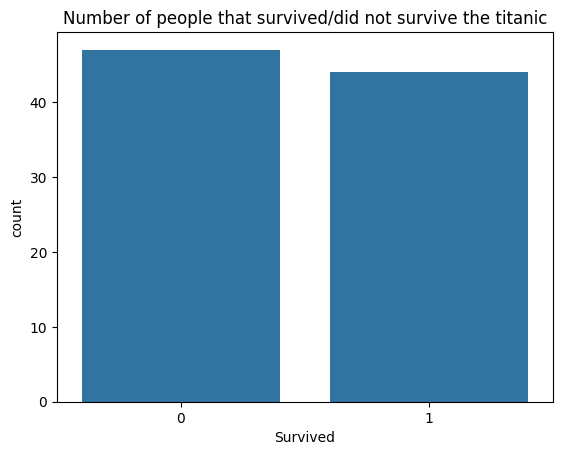

In [14]:
#count plot for 'Survived' column

sns.countplot(x='Survived',data=df)
plt.title('Number of people that survived/did not survive the titanic')
plt.show()

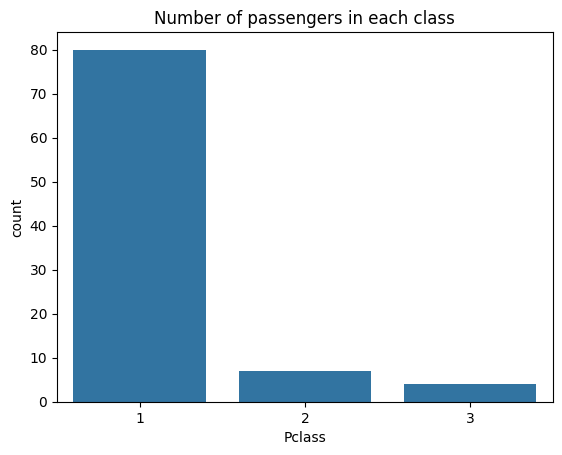

In [15]:
#Count plot for 'Pclass' column
sns.countplot(x='Pclass', data=df)
plt.title('Number of passengers in each class')
plt.show()

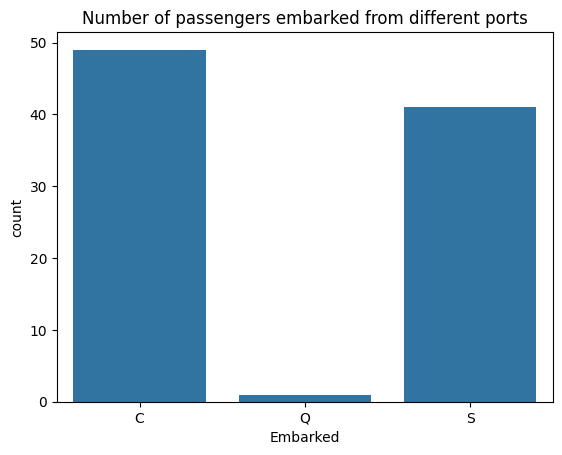

In [16]:
#Count plot for 'Embarked' column
sns.countplot(x='Embarked', data=df)
plt.title('Number of passengers embarked from different ports')
plt.show()

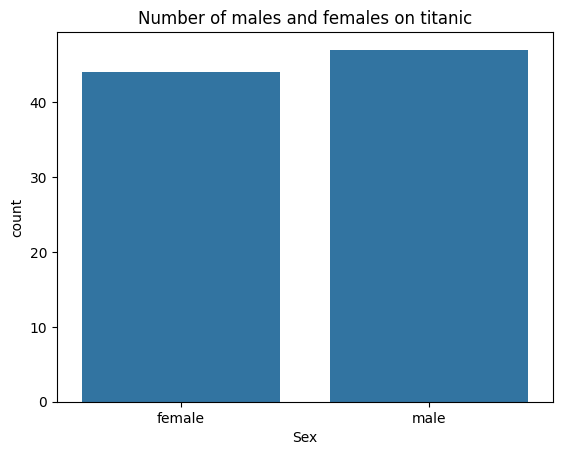

In [17]:
#Count plot for 'Pclass' column
sns.countplot(x='Sex', data=df)
plt.title('Number of males and females on titanic')
plt.show()

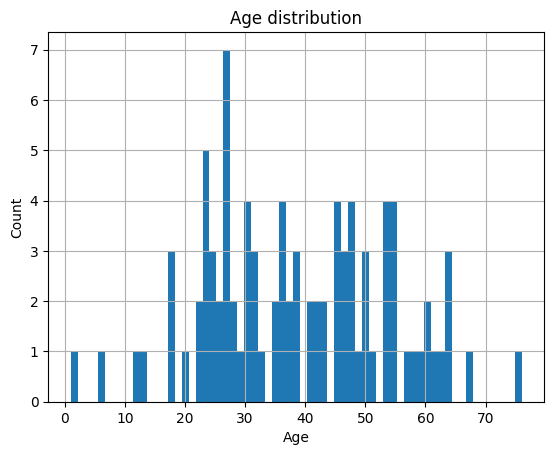

In [19]:
#Histogram for 'Age' column
df['Age'].hist(bins=65)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()


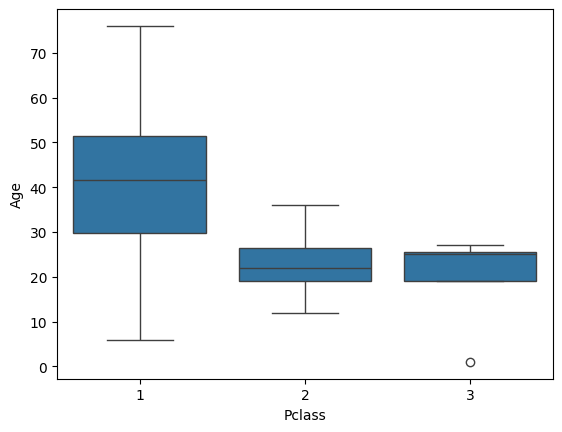

In [20]:
#   Box plot for 'Age' by 'Pclass'
sns.boxplot(x='Pclass',y='Age' ,data=df)
plt.show()

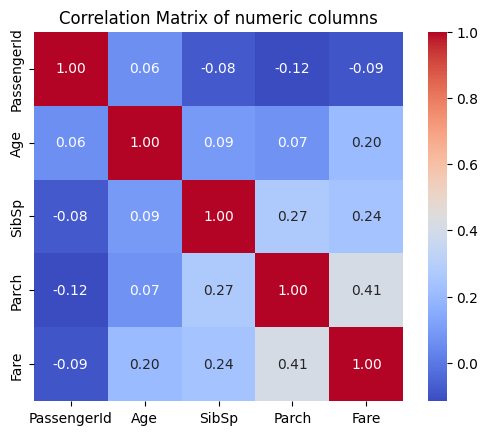

In [23]:
#Correlation analysis
#Heatmap of numeric columns
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numeric_columns =df.select_dtypes(include=['number']).columns
numeric_columns=[col for col in numeric_columns if col not in categorical_columns]
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of numeric columns')
plt.show()

In [24]:
#Analysing relationships between different variables
#Survival rate by 'Pclass'

df['Survived']=df['Survived'].astype(int)
survival_rate_by_class = df.pivot_table('Survived', index='Pclass', aggfunc='mean')
print(survival_rate_by_class)

        Survived
Pclass          
1       0.500000
2       0.428571
3       0.250000


C:\Users\suhai\AppData\Local\Temp\ipykernel_8888\3642204053.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_rate_by_class = df.pivot_table('Survived', index='Pclass', aggfunc='mean')


In [25]:
#Survival rate by 'Sex'

df['Survived']=df['Survived'].astype(int)
survival_rate_by_class = df.pivot_table('Survived', index='Sex', aggfunc='mean')
print(survival_rate_by_class)

        Survived
Sex             
female       1.0
male         0.0


C:\Users\suhai\AppData\Local\Temp\ipykernel_8888\2701861071.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_rate_by_class = df.pivot_table('Survived', index='Sex', aggfunc='mean')


In [26]:
#Survival rate by 'Embarked'

df['Survived']=df['Survived'].astype(int)
survival_rate_by_class = df.pivot_table('Survived', index='Embarked', aggfunc='mean')
print(survival_rate_by_class)

          Survived
Embarked          
C         0.448980
Q         1.000000
S         0.512195


C:\Users\suhai\AppData\Local\Temp\ipykernel_8888\1875243191.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_rate_by_class = df.pivot_table('Survived', index='Embarked', aggfunc='mean')
